In [8]:
import sys, os
import numpy as np
import torch
%matplotlib notebook
import matplotlib.pyplot as plt

In [30]:
#import matplotlib.font_manager
#[f for f in matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf') if 'cmu' in f]

In [13]:
root= 'results/'
suffix = 'stats.pth.tar'

names = ['Unique Sub Agents',
         'Single Agent',
         #'Continuous Comm',
         'Non-Unique Sub Agents']

runs = ['walking-free/Jun-05-2018-020501/',
        'simple-ant-free/Jun-05-2018-025053/',
        #'walking-contin-free/Jun-05-2018-002806/',
        'walking-free-no-unique/Jun-05-2018-100901/'
       ]

In [20]:
data = [torch.load(os.path.join(root, run, suffix)) for run in runs]
all_steps = [run['steps'] for run in data]
stats = [run['stats'] for run in data]
print(stats[0].keys())

dict_keys(['atrain-objective-delta', 'atrain-mean-kl', 'atrain-score', 'atrain-returns', 'atrain-alpha', 'atrain-vpg-norm', 'atrain-npg-norm', 'atrain-bsln-error-before', 'atrain-bsln-error-final', 'atrain-forward_reward', 'atrain-ctrl_cost', 'eval-perf', 'eval-len', 'eval-forward_reward', 'eval-ctrl_cost', 'timing-learning', 'timing-eval', 'timing-meta'])


In [21]:
steps = all_steps[0]
for step in all_steps[1:]:
    assert (steps-step == 0).all()
print('steps check passed')

steps check passed


In [37]:
figsize = (8,6)
lw = 2
#plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=16)
#plt.rc('font', family='serif', serif=['Computer Modern'], size=9)

<IPython.core.display.Javascript object>


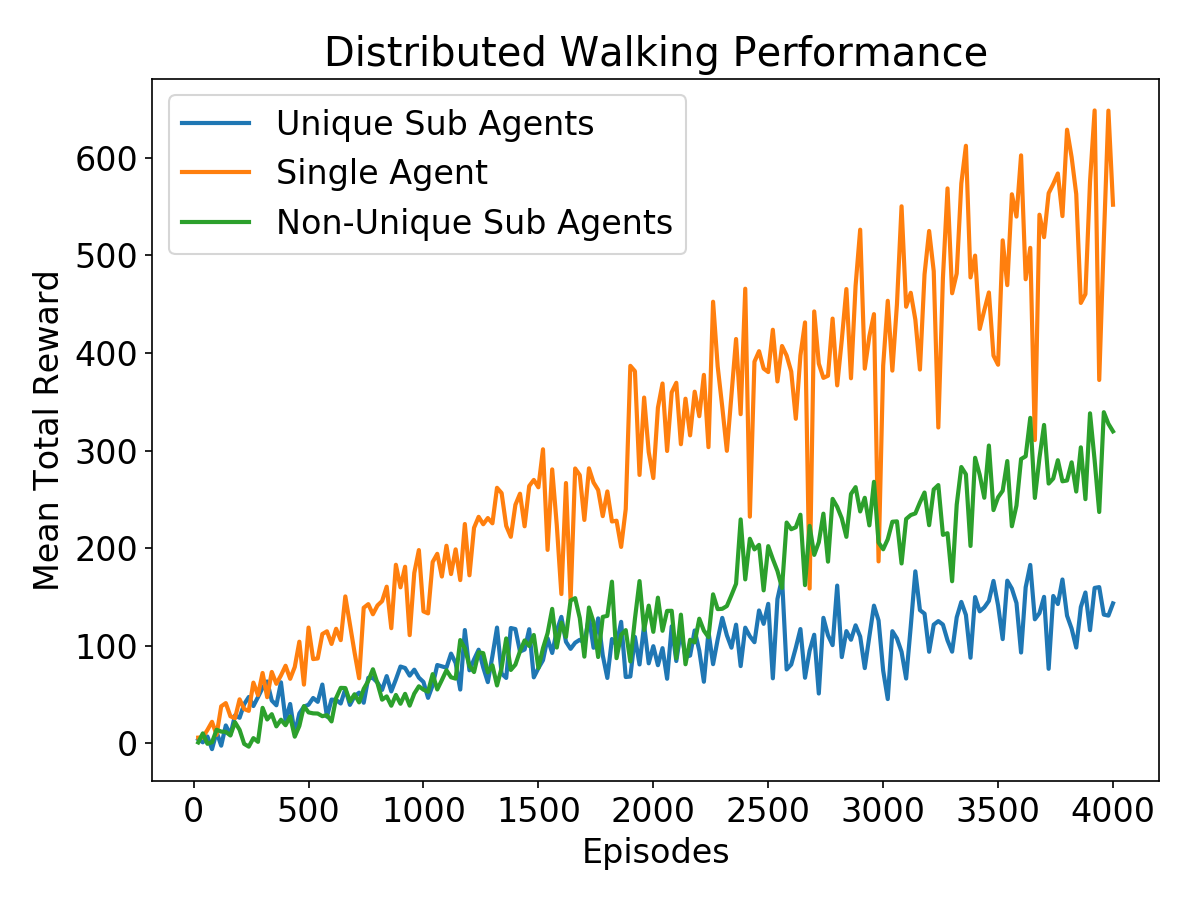

C:\Users\anwan\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [39]:
# performance
fig = plt.figure(figsize=figsize)
for name, run in zip(names, stats):
    plt.plot(steps, run['eval-perf'], lw=lw, label=name)
plt.xlabel('Episodes')
plt.ylabel('Mean Total Reward')
plt.title('Distributed Walking Performance')
plt.legend()
#fig.set_facecolor('#08f8f2')
fig.tight_layout()
fig.savefig('walking_perf.png')